In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


## Load Dataset

In [2]:

# Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Float32 + Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Channel dimension ekle
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Create Model

In [3]:
# Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(16, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [4]:
# Compile
model.compile(
    optimizer="adam", # hatalarım nöronların değerlerini nasıl değiştirecek
    loss="sparse_categorical_crossentropy", # ne kadar hata yaptım
    metrics=["accuracy"]
)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [5]:
# Train
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8430 - loss: 0.5170 - val_accuracy: 0.9783 - val_loss: 0.0770
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9779 - loss: 0.0738 - val_accuracy: 0.9795 - val_loss: 0.0701
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9839 - loss: 0.0513 - val_accuracy: 0.9865 - val_loss: 0.0460
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9872 - val_loss: 0.0444
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9872 - val_loss: 0.0410


## Evaluation

In [6]:
# Test
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9862 - loss: 0.0435


In [7]:
print("Test accuracy:", test_acc)

Test accuracy: 0.9890999794006348


## Inference

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [9]:
# Test setinden rastgele bir indeks seç
idx = random.randint(0, len(x_test) - 1)

# Orijinal görüntü
img = x_test[idx]

# Gerçek label
true_label = y_test[idx]

In [10]:
# Modele vereceğimiz input (batch dimension ekle)
input_img = np.expand_dims(img, axis=0)

In [11]:
# Tahmin yap
pred = model.predict(input_img)

# En yüksek olasılıklı sınıf
pred_label = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [12]:
# Sonucu yazdır
print("Gerçek Etiket:", true_label)
print("Tahmin:", pred_label)
print("Olasılıklar:", pred[0])

Gerçek Etiket: 4
Tahmin: 4
Olasılıklar: [1.1604387e-05 5.3139013e-07 7.2355490e-08 7.4218264e-07 9.9997401e-01
 1.8735388e-08 1.0691355e-06 1.1542831e-05 3.1115599e-07 1.1159854e-08]


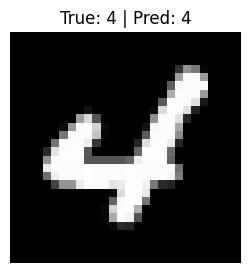

In [13]:
# Görselleştir
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"True: {true_label} | Pred: {pred_label}")
plt.axis("off")
plt.show()


In [ ]:
# model.save("mnist_cnn_model.keras")
# model.save("mnist_cnn_model.h5")
# model = tf.keras.models.load_model("mnist_cnn_model.h5")

In [ ]:
# model = tf.keras.models.load_model("mnist_cnn_model.keras")
# model.load_weights("mnist_weights.weights.h5")